In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Use matplotlib in Jupyter Notebook Outputs
%matplotlib inline

In [4]:

# Input data - [SAT Score, GPA]
X = [[1590,2.9], [1540,2.7], [1600,2.6], [1590,2.7], [1520,2.5], [1540,2.4], [1560,2.3], [1490,2.3], [1510,2.4],
     [1350,3.9], [1360,3.7], [1370,3.8], [1380,3.7], [1410,3.6], [1420,3.9], [1430,3.4], [1450,3.7], [1460,3.2],
     [1590,3.9], [1540,3.7], [1600,3.6], [1490,3.7], [1520,3.5], [1540,3.4], [1560,3.3], [1460,3.3], [1510,3.4],
     [1340,2.9], [1360,2.4], [1320,2.5], [1380,2.6], [1400,2.1], [1320,2.5], [1310,2.7], [1410,2.1], [1305,2.5],
     [1460,2.7], [1500,2.9], [1300,3.5], [1320,3.6], [1400,2.7], [1300,3.1], [1350,3.1], [1360,2.9], [1305,3.9], 
     [1430,3.0], [1440,2.3], [1440,2.5], [1380,2.1], [1430,2.1], [1400,2.5], [1420,2.3], [1310,2.1], [1350,2.0]]

# Labels - Accepted or Rejected
Y = ['accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected']

[]

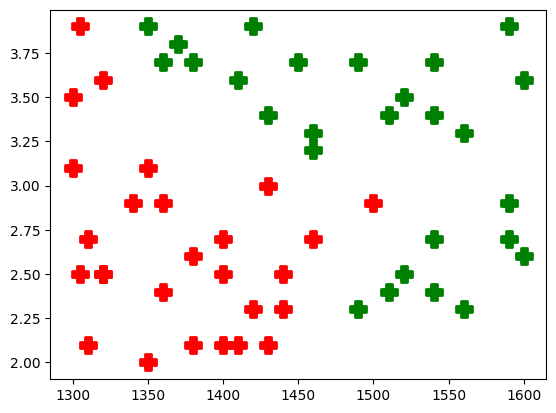

In [5]:
for i in range(len(X)):
    if Y[i] == 'accepted':
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='green')
    else:
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='red')
        
plt.plot()

In [6]:
# Find which variable is the most in an array of variables
def most_found(array):
    list_of_words = []
    for i in range(len(array)):
        if array[i] not in list_of_words:
            list_of_words.append(array[i])
            
    most_counted = ''
    n_of_most_counted = None
    
    for i in range(len(list_of_words)):
        counted = array.count(list_of_words[i])
        if n_of_most_counted == None:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted < counted:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted == counted:
            most_counted = None
            
    return most_counted

In [7]:
def find_neighbors(point, data, labels, k=3):
    # How many dimentions do the space have?
    n_of_dimensions = len(point)
    
    #find nearest neighbors
    neighbors = []
    neighbor_labels = []
    
    for i in range(0, k):
        # To find it in data later, I get its order
        nearest_neighbor_id = None
        smallest_distance = None
        
        for i in range(0, len(data)):
            eucledian_dist = 0
            for d in range(0, n_of_dimensions):
                dist = abs(point[d] - data[i][d])
                eucledian_dist += dist
                
            eucledian_dist = np.sqrt(eucledian_dist)
            
            if smallest_distance == None:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
            elif smallest_distance > eucledian_dist:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
                
        neighbors.append(data[nearest_neighbor_id])
        neighbor_labels.append(labels[nearest_neighbor_id])
        
        data.remove(data[nearest_neighbor_id])
        labels.remove(labels[nearest_neighbor_id])
    return neighbor_labels

def k_nearest_neighbor(point, data, labels, k=3):
    
    # If two different labels are most found, continue to search for 1 more k
    while True:
        neighbor_labels = find_neighbors(point, data, labels, k=k)
        label = most_found(neighbor_labels)
        if label != None:
            break
        k += 1
        if k >= len(data):
            break
            
    return label

In [ ]:
point = [1500, 2.3]
k_nearest_neighbor(point, X, Y, k=5)